In [1]:
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
SP = pd.read_csv('StudentsPerformance.csv')

In [3]:
SP.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
SP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
SP.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
SP['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [7]:
SP['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [8]:
SP['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [9]:
SP['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [10]:
SP['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

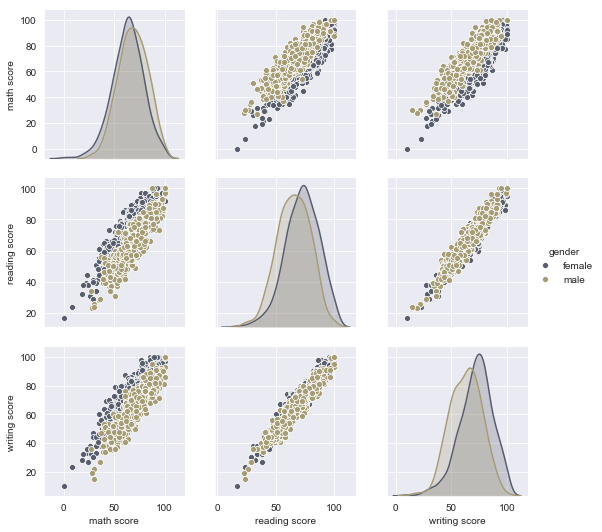

In [11]:
sns.pairplot(SP,hue='gender',palette='cividis')

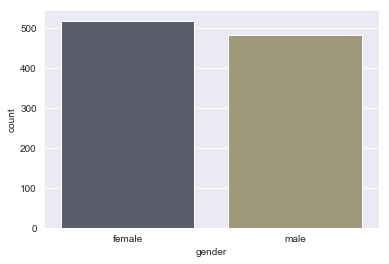

In [12]:
sns.countplot(x='gender',data = SP,palette='cividis')

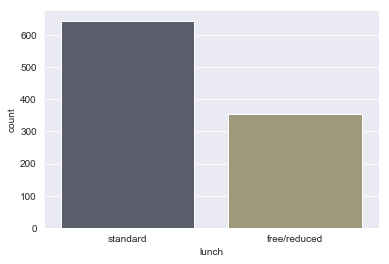

In [13]:
sns.countplot(x='lunch',data=SP,palette='cividis')

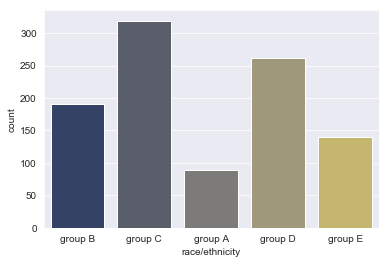

In [14]:
sns.countplot(x='race/ethnicity',data=SP,palette='cividis')

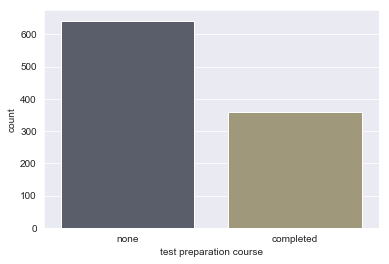

In [15]:
sns.countplot(x='test preparation course',data=SP,palette='cividis')

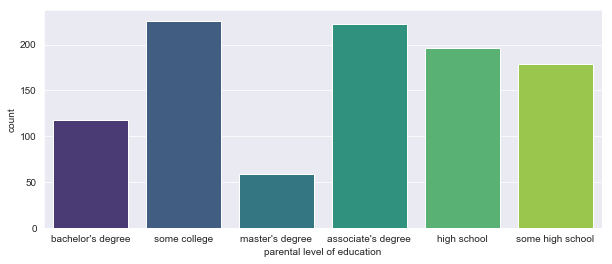

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(x='parental level of education',data=SP,palette='viridis')

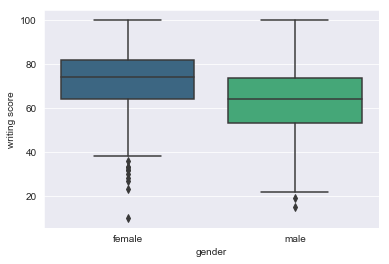

In [17]:
sns.boxplot(x='gender',y='writing score',data=SP,palette='viridis')

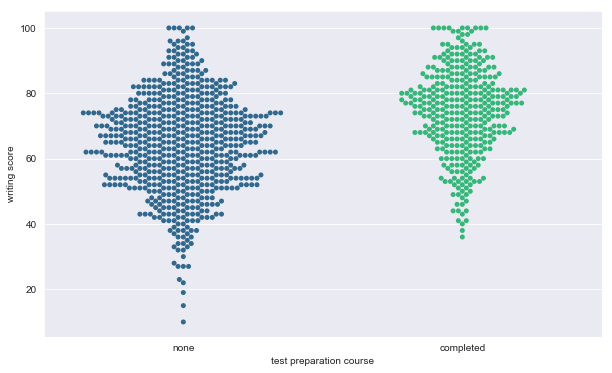

In [18]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='test preparation course',y='writing score',data=SP,palette='viridis')

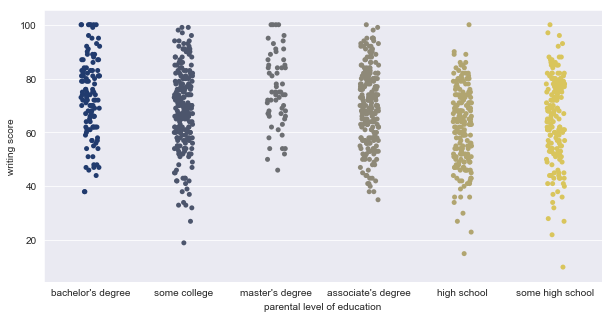

In [19]:
plt.figure(figsize=(10,5))
sns.stripplot(x='parental level of education',y='writing score',data=SP,palette='cividis')

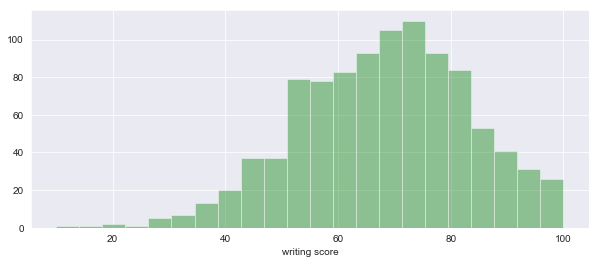

In [20]:
plt.figure(figsize=(10,4))
sns.distplot(SP['writing score'],kde =False,color='green')

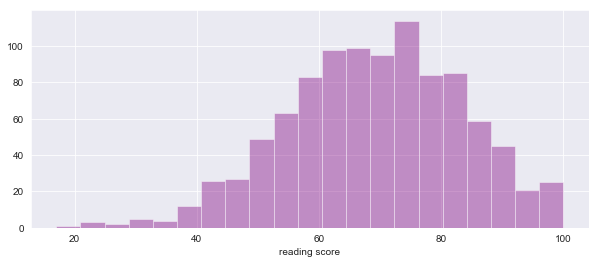

In [21]:
plt.figure(figsize=(10,4))
sns.distplot(SP['reading score'],kde =False,color='purple')

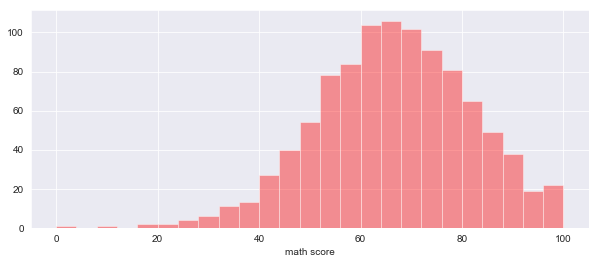

In [22]:
plt.figure(figsize=(10,4))
sns.distplot(SP['math score'],kde =False,color='red')

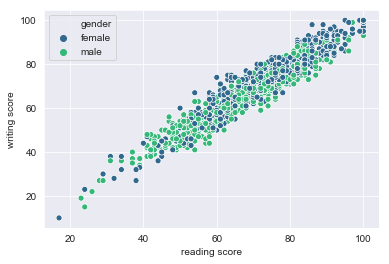

In [23]:
sns.scatterplot(x='reading score',y='writing score',data=SP,hue='gender',palette='viridis')

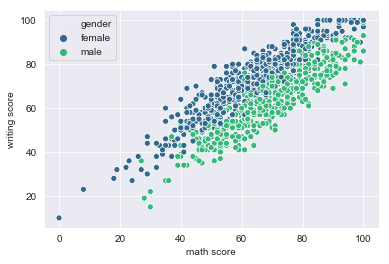

In [24]:
sns.scatterplot(x='math score',y='writing score',data=SP,hue='gender',palette='viridis')

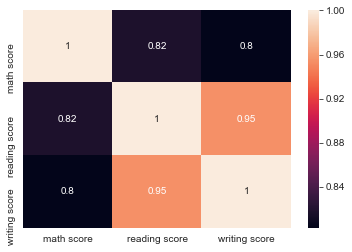

In [25]:
sns.heatmap(SP.corr(),annot=True)

In [26]:
mapGender = {'female':0,'male':1}
mapGroup = {'group C':3,'group D':4,'group B' :2,'group E':5,'group A':1}
mapLevel = {'some college':1,"associate's degree":2,"high school":3,'some high school':4,"bachelor's degree":5,"master's degree":6}
mapLunch = {"standard":0,"free/reduced":1}
mapPrepare = {'none':0,'completed':1}

In [27]:
SP.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [28]:
SP['gender'] = SP['gender'].map(mapGender)
SP['race/ethnicity'] = SP['race/ethnicity'].map(mapGroup)
SP['parental level of education'] = SP['parental level of education'].map(mapLevel)
SP['lunch'] = SP['lunch'].map(mapLunch)
SP['test preparation course'] = SP['test preparation course'].map(mapPrepare)

In [29]:
SP.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,2,5,0,0,72,72,74
1,0,3,1,0,1,69,90,88
2,0,2,6,0,0,90,95,93
3,1,1,2,1,0,47,57,44
4,1,3,1,0,0,76,78,75


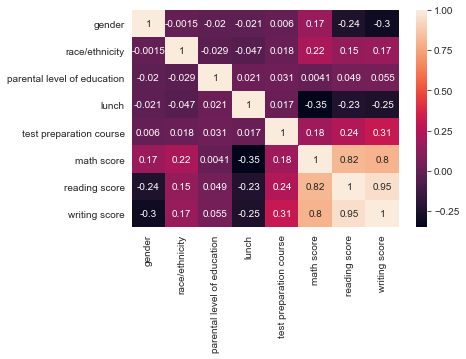

In [30]:
sns.heatmap(SP.corr(),annot=True)

### LINEAR REGRESSION / PREDICT WRITING SCORE

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = SP.drop('writing score',axis = 1)
y = SP['writing score']

In [33]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
print(lm.intercept_)

4.91002251075011


In [38]:
print(lm.coef_) #this coeffecient relates to the values in X_train

[-6.54672908  0.07675283  0.11242309 -0.15394811  3.95945737  0.30623389
  0.63557169]


In [39]:
coef = pd.DataFrame(lm.coef_,X.columns,columns = ['coef'])

In [40]:
coef

,coef
gender,-6.546729
race/ethnicity,0.076753
parental level of education,0.112423
lunch,-0.153948
test preparation course,3.959457
math score,0.306234
reading score,0.635572


In [41]:
predictions = lm.predict(X_test)

Text(0.5, 0, 'predicted score')

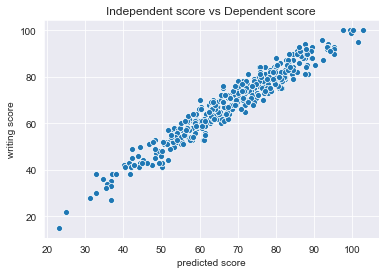

In [42]:
sns.scatterplot(y=y_test,x=predictions)
plt.title('Independent score vs Dependent score')
plt.xlabel('predicted score')

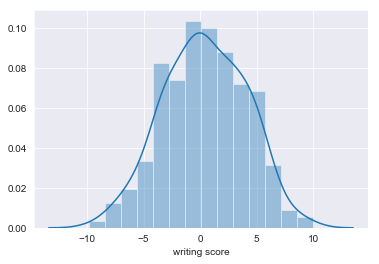

In [43]:
sns.distplot((y_test-predictions))

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [44]:
from sklearn import metrics

In [45]:
metrics.mean_absolute_error(y_test,predictions)

3.003726373337877

In [46]:
metrics.mean_squared_error(y_test,predictions)

13.580525184005415

In [47]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3.6851764115175567

### LOGISTIC REGRESSION / PREDICT GENDER

In [48]:
X= SP.drop('gender',axis = 1)
y=SP['gender']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.33,random_state=0)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression()

In [52]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
predictions = logmodel.predict(X_test)

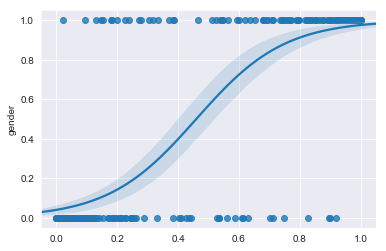

In [54]:
probability=logmodel.predict_proba(X_test)[:,1]
sns.regplot(probability,y_test,logistic=True)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[157  15]
 [ 19 139]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       172
           1       0.90      0.88      0.89       158

   micro avg       0.90      0.90      0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330

